In [1]:
# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/2024-10-13_17_last_environment_data.csv')

In [9]:
df.head()

,Time,Node,Stock,Action,Demand,Delivery,Reward
0,0,A,30.000000,33,0.000000,0,-32.315636
1,0,B,15.043242,23,12.956758,0,-32.315636
2,0,C,19.588031,0,12.411969,0,-32.315636
3,1,A,4.230519,33,25.769481,0,-50.361698
4,1,B,15.043242,23,0.000000,0,-50.361698


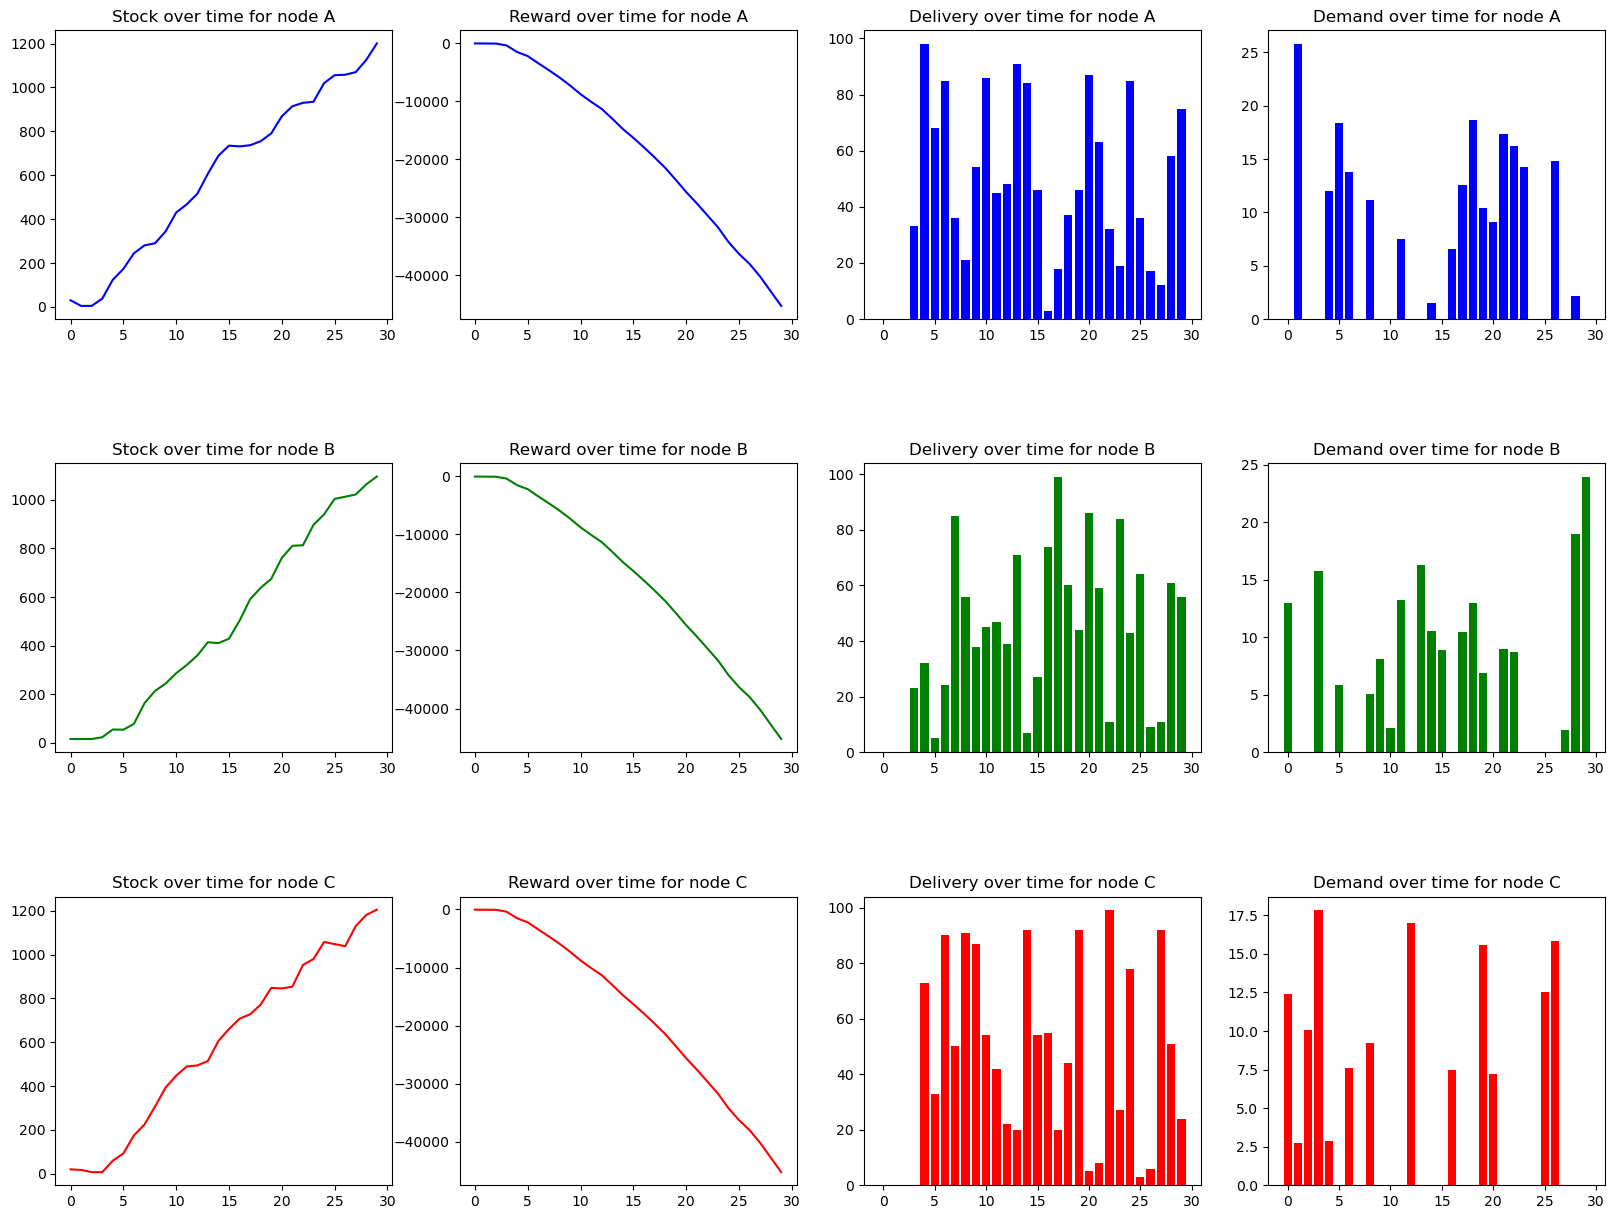

In [11]:
# Get the unique nodes
nodes = df['Node'].unique()

# Create a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create a figure with a subplot for each node and each variable
fig, axs = plt.subplots(len(nodes), 4, figsize=(20, len(nodes)*5))

# Loop over all nodes
for i, node in enumerate(nodes):
    # Select the data for this node
    node_data = df[df['Node'] == node]
    
    # Plot the 'Stock' over time for this node on its subplot
    axs[i, 0].plot(node_data['Time'], node_data['Stock'], label=node, color=colors[i % len(colors)])
    axs[i, 0].set_title(f'Stock over time for node {node}')
    
    # Plot the 'Reward' over time for this node on its subplot
    axs[i, 1].plot(node_data['Time'], node_data['Reward'], label=node, color=colors[i % len(colors)])
    axs[i, 1].set_title(f'Reward over time for node {node}')
    
    # Plot the 'Delivery' over time for this node on its subplot as a bar plot
    axs[i, 2].bar(node_data['Time'], node_data['Delivery'], label=node, color=colors[i % len(colors)])
    axs[i, 2].set_title(f'Delivery over time for node {node}')
    
    # Plot the 'Demand' over time for this node on its subplot as a bar plot
    axs[i, 3].bar(node_data['Time'], node_data['Demand'], label=node, color=colors[i % len(colors)])
    axs[i, 3].set_title(f'Demand over time for node {node}')

# Add more space between the plots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

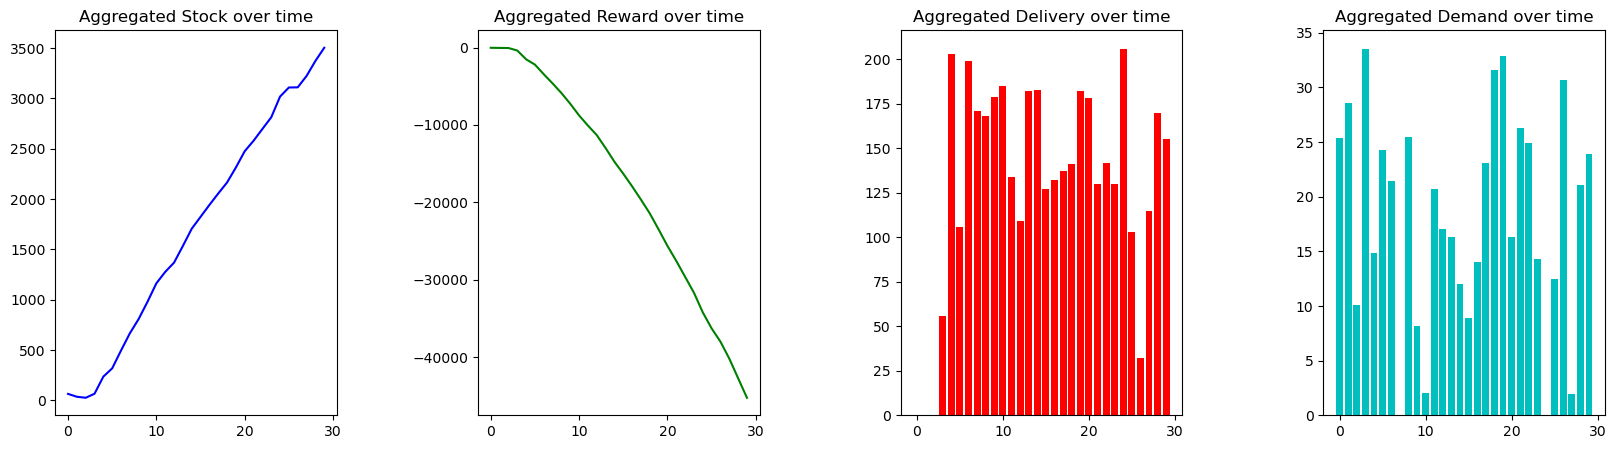

In [14]:
# Create a new DataFrame that aggregates the values for each variable across all nodes at each time point
agg_df = df.groupby('Time').sum().reset_index()
agg_df['Reward'] = agg_df['Reward'] / len(nodes)

# Create a figure with a subplot for each variable
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot the aggregated 'Stock' over time
axs[0].plot(agg_df['Time'], agg_df['Stock'], color='b')
axs[0].set_title('Aggregated Stock over time')

# Plot the aggregated 'Reward' over time
axs[1].plot(agg_df['Time'], agg_df['Reward'], color='g')
axs[1].set_title('Aggregated Reward over time')

# Plot the aggregated 'Delivery' over time as a bar plot
axs[2].bar(agg_df['Time'], agg_df['Delivery'], color='r')
axs[2].set_title('Aggregated Delivery over time')

# Plot the aggregated 'Demand' over time as a bar plot
axs[3].bar(agg_df['Time'], agg_df['Demand'], color='c')
axs[3].set_title('Aggregated Demand over time')

# Add more space between the plots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()